### Content
The dataset contains 2 folders

Infected
Uninfected
And a total of 27,558 images.

### Acknowledgements
This Dataset is taken from the official NIH Website: https://ceb.nlm.nih.gov/repositories/malaria-datasets/

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from PIL import Image
import keras
np.random.seed(10)


SIZE = 224
dataset = []  
label = [] 

parasitized_images = os.listdir('./cell_images/Parasitized/')
for i, name in enumerate(parasitized_images):    
    
    if (name.split('.')[1] == 'png'):
        image = cv2.imread('./cell_images/Parasitized/' + name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(0)

uninfected_images = os.listdir('./cell_images/Uninfected/')
for i, name in enumerate(uninfected_images):   
    
    if (name.split('.')[1] == 'png'):
        image = cv2.imread('./cell_images/Uninfected/' + name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(1)

In [2]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(dataset, to_categorical(np.array(label)), test_size = 0.20, random_state = 0)
print('X_train: ',len(X_train))
print('X_test: ',len(X_test))

X_train:  22046
X_test:  5512


## CNN

In [ ]:
from keras.models import load_model
model = load_model("./malaria_cnn.h5", compile=False)

labels= ['Parasitized', 'Uninfected']
Images=np.array(X_test)
y_pred = model.predict(Images)
y_pred[y_pred>0.5] = 1
y_pred[y_pred<0.5] = 0

predicted_class = np.argmax(y_pred, axis = 1)

In [ ]:
print("Test_Accuracy: {:.2f}%".format(model.evaluate(np.array(X_test), np.array(y_test))[1]*100))

In [ ]:
from sklearn.metrics import  confusion_matrix
tn, fp, fn, tp = confusion_matrix(np.argmax(y_test, axis = 1),np.argmax(y_pred, axis = 1)).ravel()
precision = tp/(tp+fp)
recall = tp/(tp+fn)
F1_Score = 2 * (precision * recall) / (precision + recall)

print('precision: ',precision*100)
print('recall: ',recall*100)
print('F1 Score: ',F1_Score*100)

precision = 91.46722164412071

recall =  93.87682449270203

F1 Score =  92.65635980323262

## Pretrained ResNet50

In [ ]:
model = load_model("./malaria_resnet50.h5", compile=False)

labels= ['Parasitized', 'Uninfected']
Images=np.array(X_test)
y_pred = model.predict(Images)
y_pred[y_pred>0.5] = 1
y_pred[y_pred<0.5] = 0

predicted_class = np.argmax(y_pred, axis = 1)

In [ ]:
print("Test_Accuracy: {:.2f}%".format(model.evaluate(np.array(X_test), np.array(y_test))[1]*100))

In [ ]:
tn, fp, fn, tp = confusion_matrix(np.argmax(y_test, axis = 1),np.argmax(y_pred, axis = 1)).ravel()
precision = tp/(tp+fp)
recall = tp/(tp+fn)
F1_Score = 2 * (precision * recall) / (precision + recall)

print('precision: ',precision*100)
print('recall: ',recall*100)
print('F1 Score: ',F1_Score*100)

precision =  94.00921658986175

recall =  94.41082235671058

F1 Score =  94.20959147424513

In [ ]:
plt.figure(figsize = (8 , 10))
for i in range(12):
    plt.subplot(4 , 3, i+1)
    plt.subplots_adjust(hspace = 0.3 , wspace = 0.1)
    plt.imshow(Images[i, :, :, :])
    plt.title('Class: {}'.format(labels[int(predicted_class[i])]),fontsize = 12)
    plt.axis('off')
    print(labels[int(np.argmax(y_test, axis = 1)[i])])

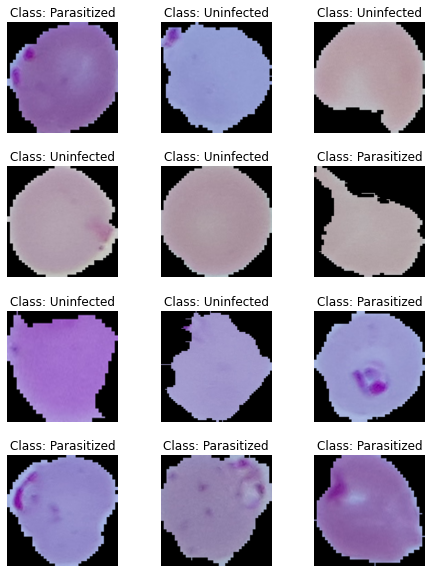